In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\Ali\Documents\python\applications(2.0).csv")

In [3]:
df.head()

,Applied at,Amount,Age,Gender,Industry,Marital status,External Rating,Education level,Location,applicant_id
0,11.30.2022 10:26:37,12000.0,29,Чоловік,Blockchain,Other,8.0,"Вища (бакалавр, спеціаліст, магістр)",Івано-Франківськ чи область,99e7b0dc6cc05dd334d8f38dc26ce9b3
1,11.30.2022 10:26:39,NaN,36,Чоловік,Public services / Government,Single,3.0,"Вища (бакалавр, спеціаліст, магістр)",NaN,63dfcf8e6904186650d6814279fbe42f
2,11.30.2022 10:26:58,7500.0,34,Чоловік,Adtech / Advertising,Single,4.0,"Вища (бакалавр, спеціаліст, магістр)",Київ чи область,10dbafaeb46c09e96b6987c03bbb3498
3,11.30.2022 10:27:31,1500.0,23,Жінка,Telecom,Single,0.0,"Вища (бакалавр, спеціаліст, магістр)",Львів чи область,5847ac62cc9eac5e323c2517dcc91ad1
4,11.30.2022 10:27:34,8400.0,33,Жінка,Automotive,Single,6.0,"Вища (бакалавр, спеціаліст, магістр)",Житомир чи область,5d21f3795b50de8e8f8f8d5f48b754f3


In [4]:
df.shape

(13315, 10)

In [5]:
df.columns

Index(['Applied at', 'Amount', 'Age', 'Gender', 'Industry', 'Marital status',
       'External Rating', 'Education level', 'Location', 'applicant_id'],
      dtype='object')

### Use the drop_duplicates() function to remove rows where the applicant_id is duplicated.

### applicant_id sütunundaki tekrar eden değerleri kaldırın.

In [8]:
# Remove duplicate values based on 'applicant_id' column
df = df.drop_duplicates(subset='applicant_id')

In [9]:
df.head()

,Applied at,Amount,Age,Gender,Industry,Marital status,External Rating,Education level,Location,applicant_id
0,11.30.2022 10:26:37,12000.0,29,Чоловік,Blockchain,Other,8.0,"Вища (бакалавр, спеціаліст, магістр)",Івано-Франківськ чи область,99e7b0dc6cc05dd334d8f38dc26ce9b3
1,11.30.2022 10:26:39,NaN,36,Чоловік,Public services / Government,Single,3.0,"Вища (бакалавр, спеціаліст, магістр)",NaN,63dfcf8e6904186650d6814279fbe42f
2,11.30.2022 10:26:58,7500.0,34,Чоловік,Adtech / Advertising,Single,4.0,"Вища (бакалавр, спеціаліст, магістр)",Київ чи область,10dbafaeb46c09e96b6987c03bbb3498
3,11.30.2022 10:27:31,1500.0,23,Жінка,Telecom,Single,0.0,"Вища (бакалавр, спеціаліст, магістр)",Львів чи область,5847ac62cc9eac5e323c2517dcc91ad1
4,11.30.2022 10:27:34,8400.0,33,Жінка,Automotive,Single,6.0,"Вища (бакалавр, спеціаліст, магістр)",Житомир чи область,5d21f3795b50de8e8f8f8d5f48b754f3


In [10]:
df.shape

(13278, 10)

### 'External Rating' alanındaki eksik değerleri sıfırla doldurun.

In [12]:
df['External Rating'] = df['External Rating'].fillna(0)

### 'Education level' alanındaki eksik değerleri "Ortaokul" metni ile doldurun.


In [14]:
df['Education level'] = df['Education level'].fillna('Ortaokul')

In [15]:
industries = pd.read_csv(r"C:\Users\Ali\Documents\python\industries(2.0).csv")

In [16]:
industries.head()

,Industry,Score
0,Blockchain,0
1,Public services / Government,20
2,Adtech / Advertising,10
3,Telecom,15
4,Automotive,15


In [17]:
industries = industries.rename(columns={'Score': 'Industry Score'})
industries.head()

,Industry,Industry Score
0,Blockchain,0
1,Public services / Government,20
2,Adtech / Advertising,10
3,Telecom,15
4,Automotive,15


In [18]:
df = pd.merge(df, industries)

In [19]:
df.head()

,Applied at,Amount,Age,Gender,Industry,Marital status,External Rating,Education level,Location,applicant_id,Industry Score
0,11.30.2022 10:26:37,12000.0,29,Чоловік,Blockchain,Other,8.0,"Вища (бакалавр, спеціаліст, магістр)",Івано-Франківськ чи область,99e7b0dc6cc05dd334d8f38dc26ce9b3,0
1,11.30.2022 10:30:00,NaN,22,Чоловік,Blockchain,Single,2.0,Ще студент вишу,NaN,bef0a5ba4df413cb8e1e3edeaf1f7de3,0
2,11.30.2022 10:36:59,30000.0,29,Чоловік,Blockchain,Single,7.0,"Вища (бакалавр, спеціаліст, магістр)",Київ чи область,d85404bd5576f05b711ad56cad428463,0
3,11.30.2022 10:44:28,16050.0,50,Чоловік,Blockchain,Other,15.0,"Вища (бакалавр, спеціаліст, магістр)",Київ чи область,667563fc9922d71c7c2bfa8e9fba9fbc,0
4,11.30.2022 10:46:30,8550.0,40,Чоловік,Blockchain,Married,1.0,"Вища (бакалавр, спеціаліст, магістр)",Одеса чи область,056d0a80808828a4d4017224fd17491e,0


In [20]:
df['Applied at'] = pd.to_datetime(df['Applied at'], errors='coerce', dayfirst=True)
df['Applied on day'] = df['Applied at'].dt.day_name()
df

C:\Users\Ali\AppData\Local\Temp\ipykernel_2012\2172621285.py:1: UserWarning: Parsing dates in %m.%d.%Y %H:%M:%S format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df['Applied at'] = pd.to_datetime(df['Applied at'], errors='coerce', dayfirst=True)


,Applied at,Amount,Age,Gender,Industry,Marital status,External Rating,Education level,Location,applicant_id,Industry Score,Applied on day
0,2022-11-30 10:26:37,12000.0,29,Чоловік,Blockchain,Other,8.0,"Вища (бакалавр, спеціаліст, магістр)",Івано-Франківськ чи область,99e7b0dc6cc05dd334d8f38dc26ce9b3,0,Wednesday
1,2022-11-30 10:30:00,NaN,22,Чоловік,Blockchain,Single,2.0,Ще студент вишу,NaN,bef0a5ba4df413cb8e1e3edeaf1f7de3,0,Wednesday
2,2022-11-30 10:36:59,30000.0,29,Чоловік,Blockchain,Single,7.0,"Вища (бакалавр, спеціаліст, магістр)",Київ чи область,d85404bd5576f05b711ad56cad428463,0,Wednesday
3,2022-11-30 10:44:28,16050.0,50,Чоловік,Blockchain,Other,15.0,"Вища (бакалавр, спеціаліст, магістр)",Київ чи область,667563fc9922d71c7c2bfa8e9fba9fbc,0,Wednesday
4,2022-11-30 10:46:30,8550.0,40,Чоловік,Blockchain,Married,1.0,"Вища (бакалавр, спеціаліст, магістр)",Одеса чи область,056d0a80808828a4d4017224fd17491e,0,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...
13273,NaT,14403.0,34,Чоловік,Robotics,Married,13.0,"Вища (бакалавр, спеціаліст, магістр)",NaN,3ed663a677fa53827d49322ef876cd7e,10,NaN
13274,NaT,6000.0,30,Чоловік,Robotics,Married,0.0,"Вища (бакалавр, спеціаліст, магістр)",Львів чи область,825f8a8e84b5c3e810b9d8e3554dafd8,10,NaN
13275,NaT,900.0,18,Чоловік,Robotics,Other,1.0,Ще студент вишу,NaN,5acbd543198ee9c454813d89ee1f670d,10,NaN
13276,2022-12-14 11:13:46,3900.0,27,Жінка,Robotics,Single,1.0,"Вища (бакалавр, спеціаліст, магістр)",Одеса чи область,cd75c270d6f313368e1f5437de19dfa9,10,Wednesday


In [21]:
df['Age'] = df['Age'].astype(int)

In [22]:
day = ~df['Applied on day'].isin(['Saturday', 'Sunday'])*10 
age = ((df['Age'] >= 35) & (df['Age'] <= 55)) * 20
marital = (df['Marital status'] == 'Married') * 20
location = (df['Location'] == 'Київ чи область') * 10
industry = df['Industry Score']
positive_rating = (df['External Rating'] >= 7) * 20
negative_rating = (df['External Rating'] <= 2) * -20

df['Final score'] = day + age + marital + location + industry + positive_rating + negative_rating
df

,Applied at,Amount,Age,Gender,Industry,Marital status,External Rating,Education level,Location,applicant_id,Industry Score,Applied on day,Final score
0,2022-11-30 10:26:37,12000.0,29,Чоловік,Blockchain,Other,8.0,"Вища (бакалавр, спеціаліст, магістр)",Івано-Франківськ чи область,99e7b0dc6cc05dd334d8f38dc26ce9b3,0,Wednesday,30
1,2022-11-30 10:30:00,NaN,22,Чоловік,Blockchain,Single,2.0,Ще студент вишу,NaN,bef0a5ba4df413cb8e1e3edeaf1f7de3,0,Wednesday,-10
2,2022-11-30 10:36:59,30000.0,29,Чоловік,Blockchain,Single,7.0,"Вища (бакалавр, спеціаліст, магістр)",Київ чи область,d85404bd5576f05b711ad56cad428463,0,Wednesday,40
3,2022-11-30 10:44:28,16050.0,50,Чоловік,Blockchain,Other,15.0,"Вища (бакалавр, спеціаліст, магістр)",Київ чи область,667563fc9922d71c7c2bfa8e9fba9fbc,0,Wednesday,60
4,2022-11-30 10:46:30,8550.0,40,Чоловік,Blockchain,Married,1.0,"Вища (бакалавр, спеціаліст, магістр)",Одеса чи область,056d0a80808828a4d4017224fd17491e,0,Wednesday,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13273,NaT,14403.0,34,Чоловік,Robotics,Married,13.0,"Вища (бакалавр, спеціаліст, магістр)",NaN,3ed663a677fa53827d49322ef876cd7e,10,NaN,60
13274,NaT,6000.0,30,Чоловік,Robotics,Married,0.0,"Вища (бакалавр, спеціаліст, магістр)",Львів чи область,825f8a8e84b5c3e810b9d8e3554dafd8,10,NaN,20
13275,NaT,900.0,18,Чоловік,Robotics,Other,1.0,Ще студент вишу,NaN,5acbd543198ee9c454813d89ee1f670d,10,NaN,0
13276,2022-12-14 11:13:46,3900.0,27,Жінка,Robotics,Single,1.0,"Вища (бакалавр, спеціаліст, магістр)",Одеса чи область,cd75c270d6f313368e1f5437de19dfa9,10,Wednesday,0


In [23]:
df['Final score'] = df['Final score'] * ~(df['External Rating'] == 0) * ~df['Amount'].isna()
df

,Applied at,Amount,Age,Gender,Industry,Marital status,External Rating,Education level,Location,applicant_id,Industry Score,Applied on day,Final score
0,2022-11-30 10:26:37,12000.0,29,Чоловік,Blockchain,Other,8.0,"Вища (бакалавр, спеціаліст, магістр)",Івано-Франківськ чи область,99e7b0dc6cc05dd334d8f38dc26ce9b3,0,Wednesday,30
1,2022-11-30 10:30:00,NaN,22,Чоловік,Blockchain,Single,2.0,Ще студент вишу,NaN,bef0a5ba4df413cb8e1e3edeaf1f7de3,0,Wednesday,0
2,2022-11-30 10:36:59,30000.0,29,Чоловік,Blockchain,Single,7.0,"Вища (бакалавр, спеціаліст, магістр)",Київ чи область,d85404bd5576f05b711ad56cad428463,0,Wednesday,40
3,2022-11-30 10:44:28,16050.0,50,Чоловік,Blockchain,Other,15.0,"Вища (бакалавр, спеціаліст, магістр)",Київ чи область,667563fc9922d71c7c2bfa8e9fba9fbc,0,Wednesday,60
4,2022-11-30 10:46:30,8550.0,40,Чоловік,Blockchain,Married,1.0,"Вища (бакалавр, спеціаліст, магістр)",Одеса чи область,056d0a80808828a4d4017224fd17491e,0,Wednesday,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13273,NaT,14403.0,34,Чоловік,Robotics,Married,13.0,"Вища (бакалавр, спеціаліст, магістр)",NaN,3ed663a677fa53827d49322ef876cd7e,10,NaN,60
13274,NaT,6000.0,30,Чоловік,Robotics,Married,0.0,"Вища (бакалавр, спеціаліст, магістр)",Львів чи область,825f8a8e84b5c3e810b9d8e3554dafd8,10,NaN,0
13275,NaT,900.0,18,Чоловік,Robotics,Other,1.0,Ще студент вишу,NaN,5acbd543198ee9c454813d89ee1f670d,10,NaN,0
13276,2022-12-14 11:13:46,3900.0,27,Жінка,Robotics,Single,1.0,"Вища (бакалавр, спеціаліст, магістр)",Одеса чи область,cd75c270d6f313368e1f5437de19dfa9,10,Wednesday,0


In [24]:
df = df[df['Final score'] > 0]
df

,Applied at,Amount,Age,Gender,Industry,Marital status,External Rating,Education level,Location,applicant_id,Industry Score,Applied on day,Final score
0,2022-11-30 10:26:37,12000.0,29,Чоловік,Blockchain,Other,8.0,"Вища (бакалавр, спеціаліст, магістр)",Івано-Франківськ чи область,99e7b0dc6cc05dd334d8f38dc26ce9b3,0,Wednesday,30
2,2022-11-30 10:36:59,30000.0,29,Чоловік,Blockchain,Single,7.0,"Вища (бакалавр, спеціаліст, магістр)",Київ чи область,d85404bd5576f05b711ad56cad428463,0,Wednesday,40
3,2022-11-30 10:44:28,16050.0,50,Чоловік,Blockchain,Other,15.0,"Вища (бакалавр, спеціаліст, магістр)",Київ чи область,667563fc9922d71c7c2bfa8e9fba9fbc,0,Wednesday,60
4,2022-11-30 10:46:30,8550.0,40,Чоловік,Blockchain,Married,1.0,"Вища (бакалавр, спеціаліст, магістр)",Одеса чи область,056d0a80808828a4d4017224fd17491e,0,Wednesday,30
5,2022-11-30 10:48:36,8400.0,27,Чоловік,Blockchain,Married,6.0,"Вища (бакалавр, спеціаліст, магістр)",Черкаси чи область,56f735f424804136be23a2c0cce2ac65,0,Wednesday,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13270,2022-11-30 19:26:10,10800.0,26,Жінка,Robotics,Single,4.0,"Вища (бакалавр, спеціаліст, магістр)",NaN,392dae911243ecdd585b80451341b93e,10,Wednesday,20
13271,2022-11-30 21:27:10,9600.0,22,Чоловік,Robotics,Married,4.0,"Вища (бакалавр, спеціаліст, магістр)",Хмельницький чи область,bc824c67b10193d15d46e8a49183e71e,10,Wednesday,40
13272,NaT,7500.0,21,Жінка,Robotics,Married,2.0,"Вища (бакалавр, спеціаліст, магістр)",Київ чи область,c64cbee3c732b41ed109b9f7f3c6252c,10,NaN,30
13273,NaT,14403.0,34,Чоловік,Robotics,Married,13.0,"Вища (бакалавр, спеціаліст, магістр)",NaN,3ed663a677fa53827d49322ef876cd7e,10,NaN,60


In [26]:
dfg = df.set_index('Applied at')
dfg = dfg.resample('W', label='left').mean(numeric_only=True)
dfg = dfg.fillna(0).astype(int)

<Axes: xlabel='Applied at', ylabel='Final score'>

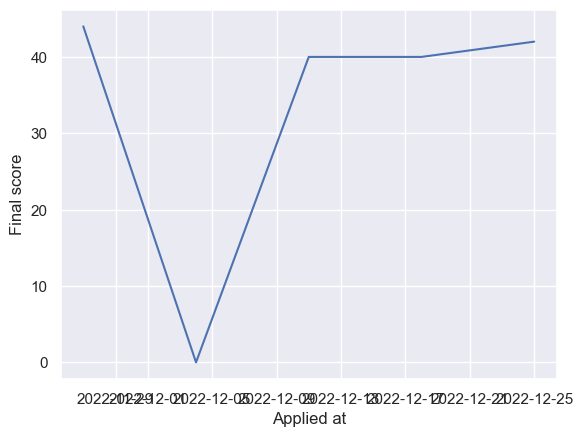

In [28]:
sns.set_theme()
sns.lineplot(data=dfg, x='Applied at', y='Final score')